# Baseline: Embedding + Flatten Model for OWQA
---

### Get the preprocessed data

In [1]:
%run ow_pre_model.ipynb

Using TensorFlow backend.


** One-hot encoding the labels in two tensors . . .
** One-hot encoding the labels in two tensors . . .
(26395, 276)
Done.


---
## Model

In [2]:

context_input = Input(shape=(c_maxlen,), dtype='int32', name='context_input')
question_input = Input(shape=(q_maxlen,), dtype='int32', name='question_input')

context_embedding = Embedding(output_dim=256, input_dim=vocabulary_size,
                         input_length=c_maxlen, name='context_embedding')(context_input)

question_embedding = Embedding(output_dim=256, input_dim=vocabulary_size, 
                         input_length=q_maxlen, name='question_embedding')(question_input)

encoded_contexts = Flatten(name='flatten_contexts')(context_embedding)
encoded_questions = Flatten(name='flatten_questions')(question_embedding)
merge1 = concatenate([encoded_questions, encoded_contexts], axis=-1, name='merge1')

answer = Dense(c_maxlen, activation='softmax', name='answer')(merge1)



model = Model([context_input, question_input], answer)

rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='categorical_crossentropy', metrics=['acc'])


model.summary()

tb = TensorBoard(log_dir='../models_logs/ow_baseline')
mc = ModelCheckpoint('../saved_models/ow_baseline_best.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model.fit([train_data['contexts'], train_data['questions']], train_data['start_wordloc'],
                    epochs=20,
                    batch_size=1024,
                    validation_split=0.2,
                    callbacks=[tb, mc])





Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
question_input (InputLayer)     (None, 36)           0                                            
__________________________________________________________________________________________________
context_input (InputLayer)      (None, 276)          0                                            
__________________________________________________________________________________________________
question_embedding (Embedding)  (None, 36, 256)      21974528    question_input[0][0]             
________________________________________________________________________________________

---

## Model Evaluation

Evaluating the model . . . 

3002/3002 [==============================] - 0s 81us/step

______________________________________________________________________________________________________________ 

                                      TRAINING LOSS AND ACCURACY PLOTS
______________________________________________________________________________________________________________ 



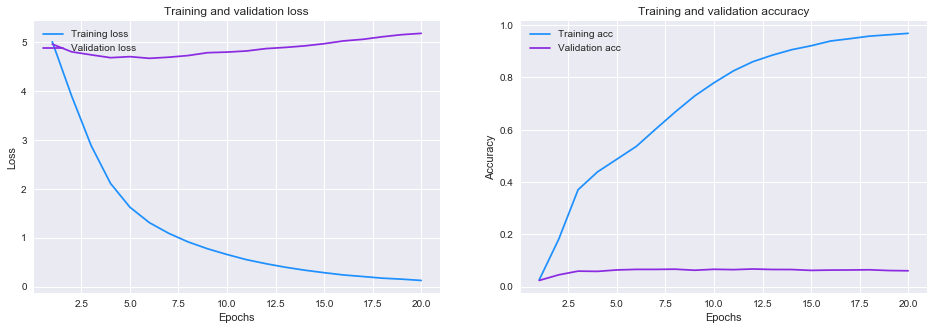

______________________________________________________________________________________________________________ 

                                         EVALUATION ON TRAINING SET
______________________________________________________________________________________________________________ 

             EM:  78.39742375449896 ;   Top2-EM:  80.66300435688578 ;   Top3-EM:  81.45482098882364 

                          loss  =  1.1064659867837225
                          acc  =  0.7962114036752207
______________________________________________________________________________________________________________ 

                                        EVALUATION ON DEVELOPMENT SET
______________________________________________________________________________________________________________ 

             EM:  7.894736842105263 ;   Top2-EM:  12.158560959360427 ;   Top3-EM:  16.25582944703531 

                          loss  =  5.020078861419556
                          acc  =  0.074283810

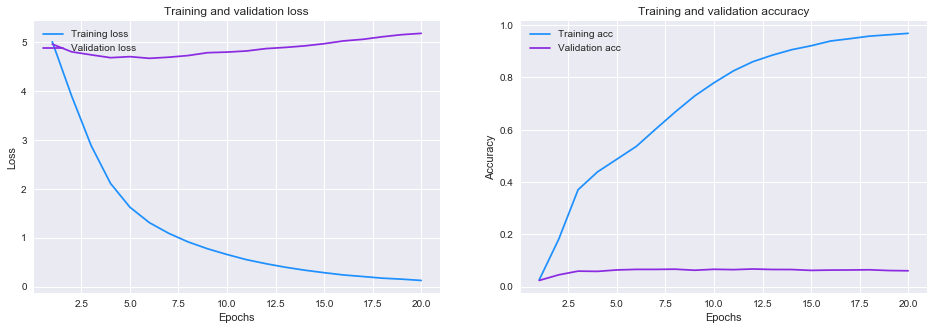

______________________________________________________________________________________________________________ 

                                         EVALUATION ON TRAINING SET
______________________________________________________________________________________________________________ 

             EM:  60.253835953779124 ;   Top2-EM:  76.79484750899792 ;   Top3-EM:  81.48512975942414 

                          loss  =  1.6611328775897625
                          acc  =  0.599810570183747
______________________________________________________________________________________________________________ 

                                        EVALUATION ON DEVELOPMENT SET
______________________________________________________________________________________________________________ 

             EM:  9.293804130579614 ;   Top2-EM:  14.623584277148568 ;   Top3-EM:  18.22118587608261 

                          loss  =  4.5057743988697885
                          acc  =  0.08627581

In [3]:
%run ../../evaluation/ow_evaluate.ipynb
saved_model = load_model('../saved_models/ow_baseline_best.h5')# load a saved model

print("Evaluating the model . . . \n")
train_data['start_pred'] = model.predict([train_data['contexts'], train_data['questions']], verbose=1)
dev_data['start_pred'] = model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

evaluation_main(train_data, dev_data, model, history.history)


print("\n\n\nEvaluating the saved best model . . . \n")
train_data['start_pred'] = saved_model.predict([train_data['contexts'], train_data['questions']], verbose=1)
dev_data['start_pred'] = saved_model.predict([dev_data['contexts'], dev_data['questions']], verbose=1)

evaluation_main(train_data, dev_data, saved_model, history.history)

